In [101]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Entrenamieto_ECI_2020.csv")
df.shape

(16947, 52)

In [102]:
df['Pricing, Delivery_Terms_Quote_Appr'] = df['Pricing, Delivery_Terms_Quote_Appr'].astype('boolean')
df['Pricing, Delivery_Terms_Approved'] = df['Pricing, Delivery_Terms_Approved'].astype('boolean')
df['Bureaucratic_Code_0_Approval'] = df['Bureaucratic_Code_0_Approval'].astype('boolean')
df['Bureaucratic_Code_0_Approved'] = df['Bureaucratic_Code_0_Approved'].astype('boolean')

df['Total_Amount_Currency'] = df['Total_Amount_Currency'].astype('category')
df['Stage'] = df['Stage'].astype('category')
df['Region'] = df['Region'].astype('category')

df['Source '] = df['Source '].astype('category')
df['Billing_Country'] = df['Billing_Country'].astype('category')
df['Account_Name'] = df['Account_Name'].astype('category')
df['Opportunity_Name'] = df['Opportunity_Name'].astype('category')
df['Account_Owner'] = df['Account_Owner'].astype('category')
df['Delivery_Terms'] = df['Delivery_Terms'].astype('category')
df['Product_Family'] = df['Product_Family'].astype('category')
df['Product_Name'] = df['Product_Name'].astype('category')
df['Brand'] = df['Brand'].astype('category')

df['Last_Modified_By'] = df['Last_Modified_By'].astype('category')
df['Opportunity_Owner'] = df['Opportunity_Owner'].astype('category')
df['Territory'] = df['Territory'].astype('category')

df['Total_Taxable_Amount_Currency'] = df['Total_Taxable_Amount_Currency'].astype('category')
df['Bureaucratic_Code'] = df['Bureaucratic_Code'].astype('category')
df['Account_Type'] = df['Account_Type'].astype('category')
df['Quote_Type'] = df['Quote_Type'].astype('category')
df['Opportunity_Type'] = df['Opportunity_Type'].astype('category')
df['Product_Type'] = df['Product_Type'].astype('category')
df['Product_Category_B'] = df['Product_Category_B'].astype('category')
df['Currency'] = df['Currency'].astype('category')
df['ASP_Currency'] = df['ASP_Currency'].astype('category')
df['Delivery_Quarter'] = df['Delivery_Quarter'].astype('category')
df['Delivery_Year'] = df['Delivery_Year'].astype('category')

#Normalizo Fechas
df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date'], format='%m/%d/%Y')
df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date'], format='%m/%d/%Y')
df['Quote_Expiry_Date'] = pd.to_datetime(df['Quote_Expiry_Date'], format='%m/%d/%Y')
df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'], format='%m/%d/%Y')
df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date'], format='%m/%d/%Y')
df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date'], format='%m/%d/%Y')
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'], format='%m/%d/%Y')
#Normalizo Floats
df['ASP'] = pd.to_numeric(df['ASP'],downcast='float',errors='coerce')
df['ASP_(converted)'] = pd.to_numeric(df['ASP_(converted)'],downcast='float',errors='coerce')
df['Total_Amount'] = pd.to_numeric(df['Total_Amount'],downcast='float',errors='coerce')
df['Total_Taxable_Amount'] = pd.to_numeric(df['Total_Taxable_Amount'],downcast='float',errors='coerce')
df['ASP'] = pd.to_numeric(df['ASP'],downcast='float',errors='coerce')

df['Sales_Contract_No'] = pd.to_numeric(df['Sales_Contract_No'],downcast='integer',errors='coerce')

In [103]:
# columnas con valor unico -> no aportan informacion
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
cols_to_drop

Index(['Submitted_for_Approval', 'Last_Activity', 'ASP_(converted)_Currency',
       'Actual_Delivery_Date', 'Prod_Category_A'],
      dtype='object')

In [104]:
# Elimino columnas que no aporta informacion
df.drop(cols_to_drop, axis=1, inplace = True)
df.shape

(16947, 47)

In [105]:
# Las propuestas diferentes a Closed Won o Closed Lost representan una infima cantidad (64/16mil)
# Son propuestas en curso que estan todavia en diferententes fases y no aportan informacion para predecir
# si la venta se produce o no
# son la moyoria del 2019 o 2020, y una que quedo colgada del 2017
df[(df['Stage']!= 'Closed Lost') & (df['Stage']!= 'Closed Won') ].shape

(64, 47)

In [106]:
# elimino esas 64 columnas
df = df[(df['Stage']== 'Closed Lost') | (df['Stage']== 'Closed Won') ]

In [ ]:
df = df[df.Total_Amount.notna()]
df.Price.value_counts()

Como se puede ver, en el 15859 de 16824 registros el valor es None, si contamos tambien los que tiene Other estamos hablando de 16468/16824.
Por lo que podriamos no utilizar

In [108]:
df.Size.value_counts()

None      15844
Other       394
Size_3      356
Size_4      196
Size_1       25
Size_0        7
Size_2        2
Name: Size, dtype: int64

En este caso, podemos ver que la columna Size, tiene informacion sonbre apenas el 3.47%(586/16888b) de los datos, con lo que tampoco la tendremos en cuenta.

In [109]:
df.drop('Size',
  axis='columns', inplace=True)
df.drop('Price',
  axis='columns', inplace=True)

In [110]:
df.to_csv(r'/content/train_clean.csv', index = False)
df_clean = pd.read_csv("/content/train_clean.csv")
df_clean.shape

(16824, 45)

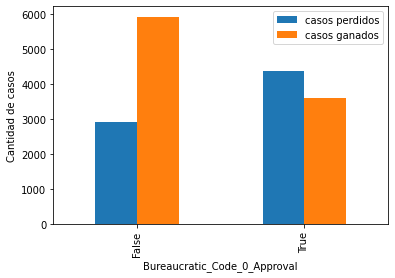

In [146]:
df_closed_won = df_clean[df_clean['Stage'] == 'Closed Won']
df_closed_lost = df_clean[df_clean['Stage'] == 'Closed Lost']

wins_lost_by_buroc_0 = pd.concat([df_closed_lost.groupby(['Bureaucratic_Code_0_Approval']).size(),df_closed_won.groupby(['Bureaucratic_Code_0_Approval']).size()], axis = 1)
col_rename = {0:'casos perdidos', 1: 'casos ganados'}
wins_lost_by_buroc_0 = df_bu_0_ganados_y_perdidos.rename( columns = col_rename)
g = wins_lost_by_buroc_0.plot(kind = 'bar', ylabel = 'Cantidad de casos')
g


Se puede observar que si la oportunidad requiere el código de aprobación burocrático n° 0,  la cantidad de casos ganados/perdidos es relativamente uniforme, pero en caso de no requerir dicha aprobación, las probabilidades de terminar en un caso ganado se incrementan bastante

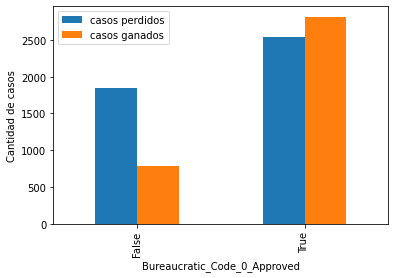

In [149]:
df_approval_need = df_clean[(df_clean['Bureaucratic_Code_0_Approval'] == 1)]
df_ap_n_w = df_approval_need[(df_approval_need['Stage'] == 'Closed Won')]
df_ap_n_l = df_approval_need[(df_approval_need['Stage'] == 'Closed Lost')]

wins_lost_by_buroc_0_approved = pd.concat([df_ap_n_l.groupby(['Bureaucratic_Code_0_Approved']).size(),df_ap_n_w.groupby(['Bureaucratic_Code_0_Approved']).size()], axis = 1)
col_rename = {0:'casos perdidos', 1: 'casos ganados'}
wins_lost_by_buroc_0_approved = wins_lost_by_buroc_0_approved.rename( columns = col_rename)
wins_lost_by_buroc_0_approved.plot(kind = 'bar', ylabel = 'Cantidad de casos')


En el caso de que se requiera el código de aprobación burocrático n° 0, podemos analizar los casos donde se aprobó o no. Si se aprobó el caso,  los casos ganados o perdidos no varian mucho, pero si se rechazó su aprobación la probabiliidad de ser un caso perdido aumenta mucho. Por estas razones podemos decir que la necesidad de este codigo burocratico es una traba para que los casos sean exitosos 

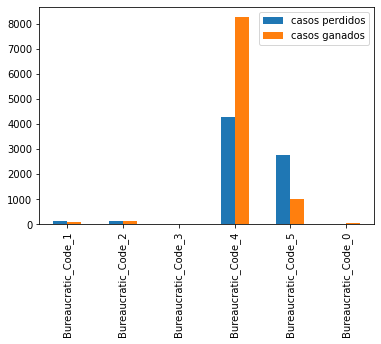

In [150]:
wins_lost_by_buroc = pd.concat([df_closed_lost.groupby(['Bureaucratic_Code']).size(),df_closed_won.groupby(['Bureaucratic_Code']).size()], axis = 1)
col_rename = {0:'casos perdidos', 1: 'casos ganados'}
wins_lost_by_buroc = wins_lost_by_buroc.rename( columns = col_rename)
wins_lost_by_buroc.plot(kind = 'bar')
